In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_Q_young_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n103        37.3556 (33.1945, 44.5639) (32.8566, 44.0153) 11.1587 (Jnode 202)\n',
 't_n104        28.7975 (24.8244, 34.7211) (24.5414, 34.3084)  9.7670 (Jnode 201)\n',
 't_n105        27.7862 (23.9506, 33.5131) (23.6554, 33.0771)  9.4217 (Jnode 200)\n',
 't_n106        25.5332 (21.9732, 30.8228) (21.7479, 30.4753)  8.7274 (Jnode 199)\n',
 't_n107        24.9561 (21.4725, 30.1332) (21.1526, 29.7067)  8.5541 (Jnode 198)\n',
 't_n108        23.8726 (20.5124, 28.8455) (20.2112, 28.4326)  8.2213 (Jnode 197)\n',
 't_n109        13.5903 (11.5433, 16.5359) (11.3719, 16.2712)  4.8993 (Jnode 196)\n',
 't_n110        13.3832 (11.3657, 16.2866) (11.1919, 16.0267)  4.8347 (Jnode 195)\n',
 't_n111        12.9767 (11.0133, 15.7993) (10.8147, 15.5196)  4.7049 (Jnode 194)\n',
 't_n112        12.4307 (10.5330, 15.1458) (10.3588, 14.8971)  4.5383 (Jnode 193)\n',
 't_n113        12.0641 (10.2138, 14.7111) (10.0369, 14.4516)  4.4147 (Jnode 192)\n',
 't_n114         8.7390 ( 7.2868, 10.7607) ( 7.1516, 1

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [6]:
posterior_mean_iqtree

[37.3556,
 28.7975,
 27.7862,
 25.5332,
 24.9561,
 23.8726,
 13.5903,
 13.3832,
 12.9767,
 12.4307,
 12.0641,
 8.739,
 1.9524,
 6.1642,
 4.3412,
 9.3389,
 7.9016,
 12.2514,
 11.7449,
 6.239,
 9.2266,
 7.7097,
 7.6234,
 11.5211,
 10.8173,
 3.547,
 12.6034,
 11.5085,
 7.8479,
 6.7014,
 5.4502,
 9.1591,
 7.4946,
 4.7798,
 22.2011,
 18.8249,
 23.4207,
 21.2863,
 19.6209,
 16.6308,
 14.3928,
 12.6954,
 10.5734,
 16.5918,
 9.7796,
 20.0375,
 17.9601,
 4.8945,
 2.3898,
 25.6192,
 23.0426,
 20.2931,
 16.078,
 15.9751,
 23.8605,
 21.6428,
 21.694,
 27.6876,
 26.0442,
 22.7671,
 10.6312,
 23.438,
 21.6668,
 18.6169,
 16.0402,
 14.213,
 23.6866,
 18.8316,
 18.0478,
 17.5022,
 17.2868,
 15.6874,
 15.0402,
 14.6807,
 13.745,
 12.6767,
 11.6499,
 10.0959,
 7.3214,
 12.712,
 11.5773,
 10.3763,
 13.6239,
 12.2917,
 11.6227,
 9.4975,
 10.4117,
 12.3638,
 10.964,
 8.9872,
 14.7896,
 13.1214,
 13.9383,
 12.8699,
 11.6229,
 8.3862,
 9.0965,
 5.7439,
 2.2195,
 17.3453,
 14.9776]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_G4_PM_codeml_young_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[36.9792,
 28.1045,
 26.9663,
 24.8798,
 24.1955,
 23.0641,
 12.4098,
 12.337,
 12.0481,
 11.4985,
 11.0286,
 8.4351,
 2.1084,
 5.9317,
 4.2088,
 8.3708,
 7.2591,
 11.4537,
 11.0048,
 5.7771,
 8.6668,
 7.1389,
 6.7682,
 10.7213,
 10.0049,
 3.1769,
 11.6231,
 10.5561,
 7.1673,
 6.4051,
 5.0754,
 8.464,
 6.7556,
 4.2558,
 21.5423,
 18.5486,
 22.9287,
 21.0234,
 19.4802,
 16.1236,
 13.9342,
 12.3882,
 10.3819,
 16.4365,
 9.8693,
 19.5777,
 17.7625,
 4.8269,
 2.1497,
 24.8678,
 22.1571,
 18.9319,
 15.0934,
 15.7183,
 23.3899,
 20.717,
 21.2706,
 27.2311,
 25.5576,
 22.4722,
 10.0701,
 23.1143,
 21.4578,
 18.866,
 16.3865,
 14.4706,
 23.2999,
 16.4416,
 15.6471,
 15.1027,
 14.7735,
 13.4132,
 12.8288,
 12.3873,
 11.6469,
 10.7834,
 9.8888,
 8.6019,
 6.2795,
 10.6835,
 9.8045,
 8.8709,
 11.8545,
 10.6712,
 9.9764,
 8.1971,
 8.9856,
 10.5351,
 9.2613,
 7.6572,
 12.7027,
 11.1419,
 12.0383,
 11.0693,
 9.8564,
 7.2562,
 7.4927,
 4.6727,
 1.7097,
 15.4857,
 13.5294]

In [12]:
posterior_mean_iqtree

[37.3556,
 28.7975,
 27.7862,
 25.5332,
 24.9561,
 23.8726,
 13.5903,
 13.3832,
 12.9767,
 12.4307,
 12.0641,
 8.739,
 1.9524,
 6.1642,
 4.3412,
 9.3389,
 7.9016,
 12.2514,
 11.7449,
 6.239,
 9.2266,
 7.7097,
 7.6234,
 11.5211,
 10.8173,
 3.547,
 12.6034,
 11.5085,
 7.8479,
 6.7014,
 5.4502,
 9.1591,
 7.4946,
 4.7798,
 22.2011,
 18.8249,
 23.4207,
 21.2863,
 19.6209,
 16.6308,
 14.3928,
 12.6954,
 10.5734,
 16.5918,
 9.7796,
 20.0375,
 17.9601,
 4.8945,
 2.3898,
 25.6192,
 23.0426,
 20.2931,
 16.078,
 15.9751,
 23.8605,
 21.6428,
 21.694,
 27.6876,
 26.0442,
 22.7671,
 10.6312,
 23.438,
 21.6668,
 18.6169,
 16.0402,
 14.213,
 23.6866,
 18.8316,
 18.0478,
 17.5022,
 17.2868,
 15.6874,
 15.0402,
 14.6807,
 13.745,
 12.6767,
 11.6499,
 10.0959,
 7.3214,
 12.712,
 11.5773,
 10.3763,
 13.6239,
 12.2917,
 11.6227,
 9.4975,
 10.4117,
 12.3638,
 10.964,
 8.9872,
 14.7896,
 13.1214,
 13.9383,
 12.8699,
 11.6229,
 8.3862,
 9.0965,
 5.7439,
 2.2195,
 17.3453,
 14.9776]

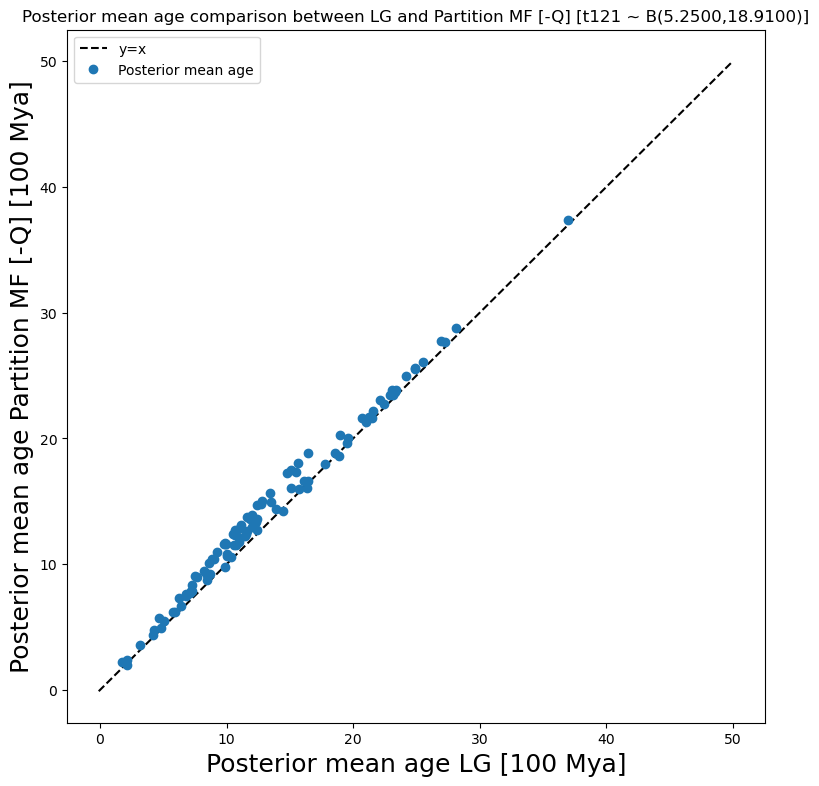

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age Partition MF [-Q] [100 Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and Partition MF [-Q] [t121 ~ B(5.2500,18.9100)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_Q_cherry_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')